<a href="https://colab.research.google.com/github/NasTiaFox30/ColabProjects/blob/master/Clustering_of_service_services.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**🚗Klasteryzacja usług serwisowych w warsztacie "Auto-Master"**

## 🛠️ Wprowadzenie:
Warsztat samochodowy **Auto-Master** w ostatnich miesiącach wykonał setki usług dla różnych marek aut.  
Właściciel warsztatu chciałby **lepiej zrozumieć typowe wzorce napraw** wykonywanych w jego firmie.

Zadaniem jest przeprowadzenie **klasteryzacji** danych serwisowych z listopada i grudnia 2024 roku.

### 📂 Dane:
- `samochody.txt`: nr rejestracyjny, marka, rok produkcji, id właściciela
- `uslugi.txt`: id usługi, opis usługi, rodzaj usługi, cena
- `wykonane.txt`: data wykonania, nr rejestracyjny samochodu, id usługi

### 🎯 Etapy analizy:

1. Wczytaj dane z plików.
2. Połącz dane w jedną tabelę.
3. Wykonaj analizy i wizualizacje 📊:
    - Liczba usług wykonanych dla każdej marki.
    - Średnia cena usługi dla marek.
    - Najczęstsze rodzaje usług.
4. Przygotuj dane do klasteryzacji.
5. Wykonaj klasteryzację metodą **KMeans**.
6. Zwizualizuj wyniki (PCA).
7. Zinterpretuj klastry i przygotuj rekomendacje dla właściciela warsztatu.

**Pamiętaj:** Twoim celem jest nie tylko stworzenie modeli, ale też **opowiedzenie historii danych**! 💬

---


## 📥 1. Wczytywanie danych

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

samochody = pd.read_csv('samochody.txt', sep='\t')
uslugi = pd.read_csv('uslugi.txt', sep='\t')
wykonane = pd.read_csv('wykonane.txt', sep='\t')

print("Samochody:")
print(samochody.head())
print("\nUsługi:")
print(uslugi.head())
print("\nWykonane:")
print(wykonane.head())

Samochody:
  nr_rejestracyjny    marka  rok_produkcji  id_wlasciciela
0         LSW 3611      kia           2014             813
1          SY 7290    skoda           2016             739
2          SB 8489     fiat           2010             158
3          SY 8015     fiat           2021             874
4          SK 4231  peugeot           2022              14

Usługi:
   id_uslugi                                    usluga  \
0          1       wymiana oleju silnikowego z filtrem   
1          2     wymiana oleju w skrzyni automatycznej   
2          3  wymiana oleju w manualnej skrzyni biegow   
3          4                    wymiana oleju w moscie   
4          5                wymiana plynu chlodniczego   

                 rodzaj_uslugi   cena  
0  olej i plyny eksploatacyjne  120.0  
1  olej i plyny eksploatacyjne  250.0  
2  olej i plyny eksploatacyjne  120.0  
3  olej i plyny eksploatacyjne   70.0  
4  olej i plyny eksploatacyjne  120.0  

Wykonane:
         data nr_rejestrac

## 🔗 2. Łączenie danych

In [2]:
wykonane_uslugi = wykonane.merge(uslugi, on='id_uslugi', how='left')
wykonane_uslugi = wykonane_uslugi.merge(samochody, on='nr_rejestracyjny', how='left')
wykonane_uslugi['wiek_samochodu'] = 2024 - wykonane_uslugi['rok_produkcji']

print("\nDane po łączeniu:")
print(wykonane_uslugi.head())


Dane po łączeniu:
         data nr_rejestracyjny  id_uslugi  \
0  2024-11-04          SK 4178          2   
1  2024-11-04          SD 1218         19   
2  2024-11-04          SD 5074         48   
3  2024-11-04          SR 6346        101   
4  2024-11-04         CSW 6689        107   

                                     usluga                rodzaj_uslugi  \
0     wymiana oleju w skrzyni automatycznej  olej i plyny eksploatacyjne   
1    wymiana lacznikow lub gum stablizatora                  zawieszenie   
2                    wymiana skrzyni biegow                    mechanika   
3        test hamulcow na plytach rolkowych                  diagnostyka   
4  pomiar zadymienia silnika ZS diagnostyka                           45   

    cena marka  rok_produkcji  id_wlasciciela  wiek_samochodu  
0  250.0  ford           2011             162              13  
1   90.0  fiat           2013             518              11  
2  550.0  fiat           2010             683              14

## 📊 3. Analiza danych i wizualizacja wyników

## Zadania:
- 📈 **Zadanie 1:** Wyświetl liczbę wykonanych usług dla każdej marki samochodu. Sporządź wykres słupkowy.
- 💲 **Zadanie 2:** Oblicz średnią cenę wykonanych usług dla każdej marki. Sporządź wykres słupkowy.
- 🛠️ **Zadanie 3:** Wyświetl liczbę wykonanych usług według rodzaju usługi. Sporządź wykres kołowy.


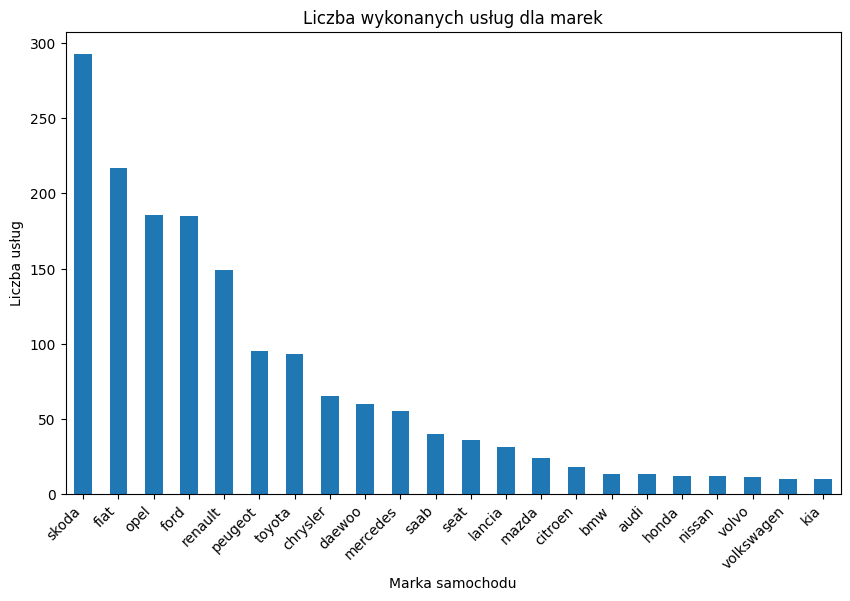

In [3]:
# Zadanie 1: Liczba usług dla marek
uslugi_marka = wykonane_uslugi['marka'].value_counts()

uslugi_marka.plot(kind='bar', figsize=(10,6), title='Liczba wykonanych usług dla marek')
plt.xlabel('Marka samochodu')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Liczba usług')
plt.show()

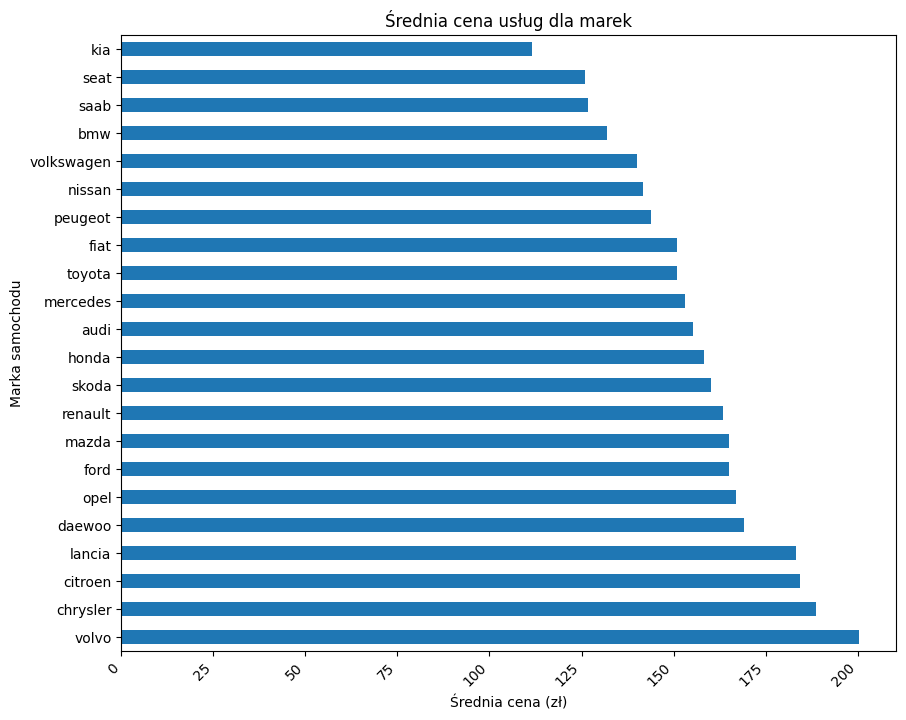

In [4]:
# Zadanie 2: Średnia cena usług dla marek
srednia_cena_marka = wykonane_uslugi.groupby('marka')['cena'].mean().sort_values(ascending=False)

srednia_cena_marka.plot(kind='barh', figsize=(10,8), title='Średnia cena usług dla marek')
plt.xlabel('Średnia cena (zł)')
plt.ylabel('Marka samochodu')
plt.xticks(rotation=45, ha='right')
plt.show()

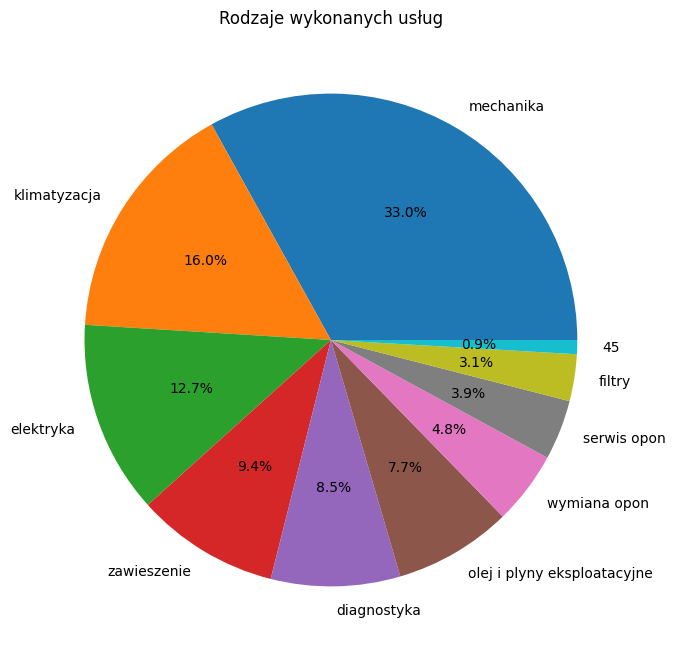

In [5]:
# Zadanie 3: Liczba usług według rodzaju usługi
rodzaje_uslug = wykonane_uslugi['rodzaj_uslugi'].value_counts().sort_values(ascending=False)

rodzaje_uslug.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), title='Rodzaje wykonanych usług')
plt.ylabel('')
plt.show()

## 📈 5. Klasteryzacja

In [6]:
# zmienne do klasteryzacji
liczba_klastrów = 3

wykonane_uslugi = wykonane_uslugi.dropna(subset=['wiek_samochodu', 'cena'])  #usuwa kolumny NaN
X = wykonane_uslugi[['wiek_samochodu', 'cena']]

kmeans = KMeans(n_clusters=liczba_klastrów, random_state=42)
kmeans.fit(X)

wykonane_uslugi['Klaster'] = kmeans.labels_ # przypisujemy informację o tym do którego klastra będzie należał klient


<ipython-input-6-c6588136418a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wykonane_uslugi['Klaster'] = kmeans.labels_ # przypisujemy informację o tym do którego klastra będzie należał klient


## 🖼️ 6. Wizualizacja klastrów

In [7]:
# wizualizacja klastrów
# centroidy
# parametry klastrów

print("\nKlaster dla każdego wiersza:")
print(wykonane_uslugi[['nr_rejestracyjny', 'marka', 'wiek_samochodu', 'rok_produkcji', 'cena', 'Klaster']].head(10))


Klaster dla każdego wiersza:
   nr_rejestracyjny       marka  wiek_samochodu  rok_produkcji   cena  Klaster
0           SK 4178        ford              13           2011  250.0        2
1           SD 1218        fiat              11           2013   90.0        0
2           SD 5074        fiat              14           2010  550.0        1
3           SR 6346        opel               3           2021   50.0        0
5          SZA 4791     renault               9           2015  160.0        2
6           SY 2101  volkswagen              11           2013  120.0        0
7           SY 4526        opel              14           2010   90.0        0
8           ZS 4850      daewoo              10           2014  250.0        2
9          SRC 5624    mercedes               9           2015  120.0        0
10         SPI 9074        opel               1           2023  120.0        0


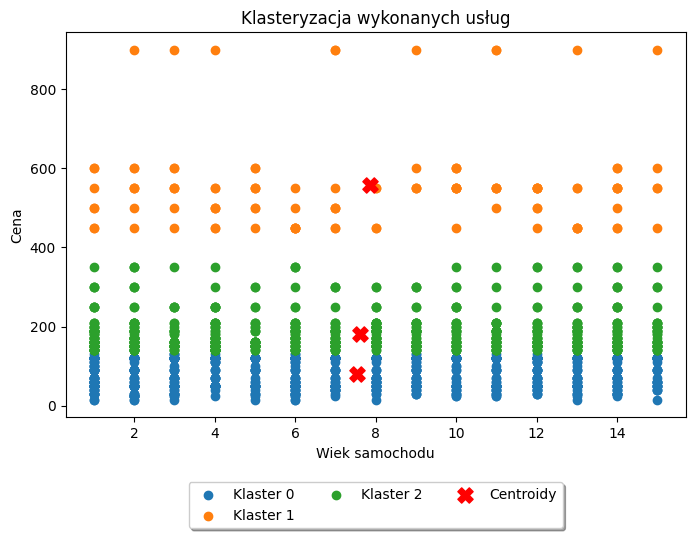

In [8]:
# Wizualizacja segmentów
plt.figure(figsize=(8, 5))
for klaster_id in sorted(wykonane_uslugi['Klaster'].unique()):
  cluster_pointers = wykonane_uslugi[wykonane_uslugi['Klaster'] == klaster_id]
  plt.scatter(
      cluster_pointers['wiek_samochodu'],
      cluster_pointers['cena'],
      label=f'Klaster {klaster_id}'
  )

# Wyznaczanie centroidów
centroidy = kmeans.cluster_centers_
plt.scatter(
    centroidy[:, 0],
    centroidy[:, 1],
    marker='X',
    s=120,
    c='red',
    label='Centroidy'
)

plt.title('Klasteryzacja wykonanych usług')
plt.xlabel('Wiek samochodu')
plt.ylabel('Cena')
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    shadow=True,
    ncol=3
)
plt.show()

## 🎯 7. Do którego klastra zostanie przypisany nowy klient?

In [9]:
# Proces przypisania nowego auta do klastra
new_auto_data = pd.DataFrame ({
    'wiek_samochodu': [2],
    'cena': [420],
})

In [10]:
new_auto_data

,wiek_samochodu,cena
0,2,420


In [11]:
# Określamy do którego segmentu będzie przynależał nowe auto
segement_nowego_auta = kmeans.predict(new_auto_data)
print(f"Nowy samochód przynależy do segmentu: {segement_nowego_auta[0]}")

Nowy samochód przynależy do segmentu: 1


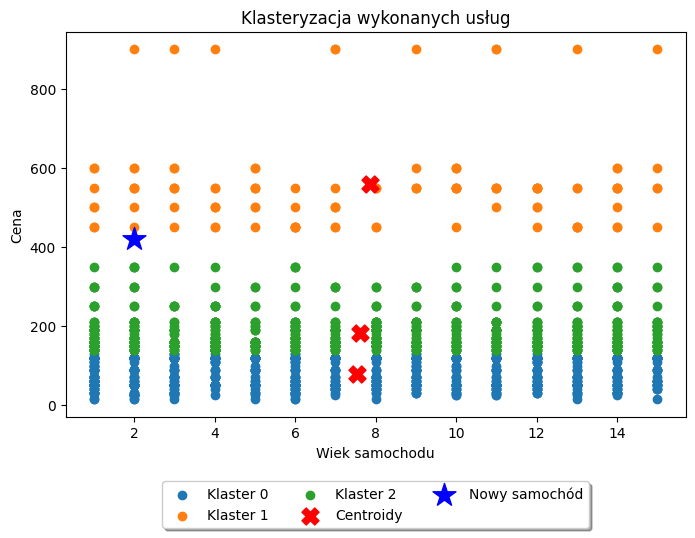

In [12]:
# Wizualizacja segmentów, nowego auta, centroidów
plt.figure(figsize=(8, 5))
for klaster_id in sorted(wykonane_uslugi['Klaster'].unique()):
  cluster_pointers = wykonane_uslugi[wykonane_uslugi['Klaster'] == klaster_id]
  plt.scatter(
      cluster_pointers['wiek_samochodu'],
      cluster_pointers['cena'],
      label=f'Klaster {klaster_id}'
  )


# Wyznaczanie centroidów
centroidy = kmeans.cluster_centers_
plt.scatter(
    centroidy[:, 0],
    centroidy[:, 1],
    marker='X',
    s=150,
    c='red',
    label='Centroidy'
)

# Dodajemy nowego auta na wykresie
plt.scatter(
    new_auto_data['wiek_samochodu'],
    new_auto_data['cena'],
    marker='*',
    s=300,
    c='Blue',
    label='Nowy samochód'
)

plt.title('Klasteryzacja wykonanych usług')
plt.xlabel('Wiek samochodu')
plt.ylabel('Cena')
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    shadow=True,
    ncol=3
)
plt.show()

## 💬 8. Interpretacja wyników
- Ile klastrów uznałeś za optymalne?
- Jaka jest charakterystyka poszczególnych klastrów?
- Jakie rekomendacje możesz przygotować dla właściciela warsztatu?

### **1.Ile klastrów uznałeś za optymalne?**

podsumowując, na podstawie Silhouette Score i wizualnie, optymalna liczba klastrów dla tych danych - to 2 lub 3.

Silhouette Score dla 2 klasterów : 0.80
Silhouette Score dla 3 klasterów : 0.56
Silhouette Score dla 4 klasterów : 0.57
Silhouette Score dla 5 klasterów : 0.57
Silhouette Score dla 6 klasterów : 0.60


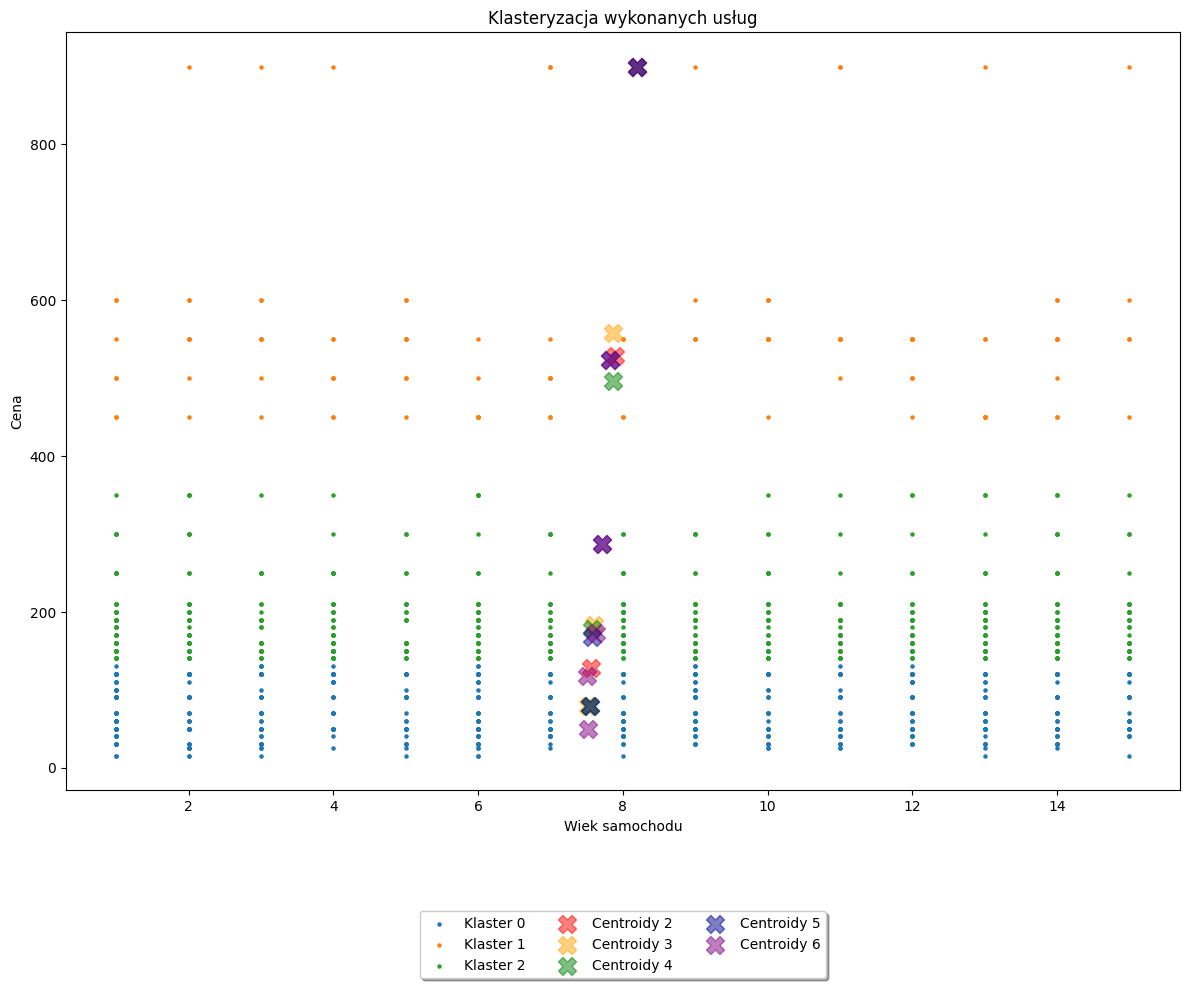

In [13]:
from sklearn.metrics import silhouette_score

wykonane_uslugi = wykonane_uslugi.dropna(subset=['wiek_samochodu', 'cena'])  #usuwa kolumny NaN
X = wykonane_uslugi[['wiek_samochodu', 'cena']]

# Wizualizacja segmentów, nowego auta, centroidów
plt.figure(figsize=(12, 10))
for klaster_id in sorted(wykonane_uslugi['Klaster'].unique()):
  cluster_pointers = wykonane_uslugi[wykonane_uslugi['Klaster'] == klaster_id]
  plt.scatter(
      cluster_pointers['wiek_samochodu'],
      cluster_pointers['cena'],
      label=f'Klaster {klaster_id}',
      s=5,
  )

#Moduły:
models = {}
scores = {}
colors= ['red', 'orange', 'green', 'darkblue', 'purple', 'black']

# liczba klasterów od 2 do 6 (włącznie)
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    models[k] = kmeans

    # Metryka służąca do oceny jakości segentów
    # Silhouette Score (współczynik sylwetki)
    scores[k] = silhouette_score(X, kmeans.labels_)
    print(f"Silhouette Score dla {k} klasterów : {scores[k]:.2f}")

    # Wyznaczanie centroidów
    centroidy = kmeans.cluster_centers_
    plt.scatter(
        centroidy[:, 0],
        centroidy[:, 1],
        marker='X',
        s=170,
        c=colors[k-2],
        alpha=0.5,
        label=f'Centroidy {k}'
    )


plt.title('Klasteryzacja wykonanych usług')
plt.xlabel('Wiek samochodu')
plt.ylabel('Cena')
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    shadow=True,
    ncol=3
)
plt.tight_layout()
plt.show()

### **2.Charakterystyka porównując trzech klasterów:**

Klaster 1:

Średni wiek samochodu: 7.5 lat

Średnia cena usługi: 79.2 PLN

Podsumowanie: najczęściej korzystano z **tanich** usług takich jak: wymiana oleju, diagnostyka - samochody sredniego wieku


Klaster 2:

Średni wiek samochodu: 7.9 lat

Średnia cena usługi: 558.3 PLN

Podsumowanie: najczęściej korzystano z **drogich** usług takich jak: wymiana skrzyni biegów, naprawa zawieszenia - starsze samochody


Klaster 3:

Średni wiek samochodu: 7.6 lat

Średnia cena usługi: 182.5 PLN

Podsumowanie: najczęściej korzystano z usług o **średniej ceny** takich jak: wymiana filtrów, rozrządu.. -


In [14]:
for klaster_id in sorted(wykonane_uslugi['Klaster'].unique()):
    cluster_data = wykonane_uslugi[wykonane_uslugi['Klaster'] == klaster_id]
    srednia_wiek = cluster_data['wiek_samochodu'].mean()
    srednia_cena = cluster_data['cena'].mean()
    print(f"Klaster {klaster_id+1}: Średni wiek samochodu: {srednia_wiek:.2f}, Średnia cena usługi: {srednia_cena:.2f}")

Klaster 1: Średni wiek samochodu: 7.52, Średnia cena usługi: 79.24
Klaster 2: Średni wiek samochodu: 7.86, Średnia cena usługi: 558.33
Klaster 3: Średni wiek samochodu: 7.61, Średnia cena usługi: 182.51


### **3.Rekomendacje dla właściciela warsztatu:**

Usługi można lepiej targetować optymalizując ceny, marketing i zarządzanie warsztatem.


Rekomendacje dla właściciela warsztatu:

Klaster 1:

Rekomendacje:
✅ Wprowadź pakiety serwisowe – np. "Przegląd roczny za 299 zł" (obejmujący wymianę oleju, filtrów i podstawową diagnostykę).
✅ Program lojalnościowy – np. "5. wizyta gratis" dla stałych klientów.
✅ Automatyzacja przypomnień – SMS/email z przypomnieniem o wymianie oleju co 15 tys. km.
✅ Promuj dodatkowe usługi – np. "Darmowa kontrola zawieszenia przy wymianie oleju".


Klaster 2:

Rekomendacje:
💰 Oferta rat 0% – Dla napraw powyżej 1000 zł, aby zmniejszyć barierę finansową.
🔧 Współpraca z ubezpieczycielami – Czy warsztat może być polecany przez AC/OC przy dużych naprawach?
📢 Targetowana reklama – Kampanie Google/Facebook dla kierowców aut 7+ letnich (np. "Awaria skrzyni biegów? Naprawimy ją taniej niż dealer!").
🛠️ Zapasy części – Zwiększ magazyn części do popularnych awarii (np. tanie zamienniki do Fordów/Fiatów).


Klaster 3:

Rekomendacje:
⏳ Upsell prewencyjny – Np. "Wymieniając rozrząd, sprawdź za 50 zł stan wody w chłodnicy".
📅 Kalendarz przeglądów – Propozycja "Planu Naprawczego" dla klientów (np. co 30 tys. km wymiana paska, co 50 tys. – hamulce).
💡 Edukacja klientów – Broszury/QR kody w warsztacie: "Jak przedłużyć życie samochodu po 7 latach?".